In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('car_resale_prices.csv')

In [3]:
df.head()

,Unnamed: 0,full_name,resale_price,registered_year,engine_capacity,insurance,transmission_type,kms_driven,owner_type,fuel_type,max_power,seats,mileage,body_type,city
0,0,2017 Maruti Baleno 1.2 Alpha,₹ 5.45 Lakh,2017,1197 cc,Third Party insurance,Manual,"40,000 Kms",First Owner,Petrol,83.1bhp,5.0,21.4 kmpl,Hatchback,Agra
1,1,2018 Tata Hexa XTA,₹ 10 Lakh,2018,2179 cc,Third Party insurance,Automatic,"70,000 Kms",First Owner,Diesel,153.86bhp,7.0,17.6 kmpl,MUV,Agra
2,2,2015 Maruti Swift Dzire VXI,₹ 4.50 Lakh,2015,1197 cc,Third Party insurance,Manual,"70,000 Kms",Second Owner,Petrol,83.14bhp,5.0,20.85 kmpl,Sedan,Agra
3,3,2015 Maruti Swift Dzire VXI,₹ 4.50 Lakh,2015,1197 cc,Third Party insurance,Manual,"70,000 Kms",Second Owner,Petrol,83.14bhp,5.0,20.85 kmpl,Sedan,Agra
4,4,2009 Hyundai i10 Magna 1.1,₹ 1.60 Lakh,2009,1086 cc,Third Party insurance,Manual,"80,000 Kms",First Owner,Petrol,68.05bhp,5.0,19.81 kmpl,Hatchback,Agra


In [4]:
df.isnull().sum()

Unnamed: 0             0
full_name              0
resale_price           0
registered_year       69
engine_capacity       14
insurance              7
transmission_type      0
kms_driven             3
owner_type            45
fuel_type              0
max_power            102
seats                 10
mileage              508
body_type              0
city                   0
dtype: int64

In [5]:
df['registered_year'] = df['full_name'].apply(lambda x: x.split(' ')[0]).astype(float)
df['registered_year'].isnull().sum()

0

In [6]:
df.dropna(inplace = True)
df.isnull().sum()

Unnamed: 0           0
full_name            0
resale_price         0
registered_year      0
engine_capacity      0
insurance            0
transmission_type    0
kms_driven           0
owner_type           0
fuel_type            0
max_power            0
seats                0
mileage              0
body_type            0
city                 0
dtype: int64

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 16808 entries, 0 to 17445
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0         16808 non-null  int64  
 1   full_name          16808 non-null  object 
 2   resale_price       16808 non-null  object 
 3   registered_year    16808 non-null  float64
 4   engine_capacity    16808 non-null  object 
 5   insurance          16808 non-null  object 
 6   transmission_type  16808 non-null  object 
 7   kms_driven         16808 non-null  object 
 8   owner_type         16808 non-null  object 
 9   fuel_type          16808 non-null  object 
 10  max_power          16808 non-null  object 
 11  seats              16808 non-null  float64
 12  mileage            16808 non-null  object 
 13  body_type          16808 non-null  object 
 14  city               16808 non-null  object 
dtypes: float64(2), int64(1), object(12)
memory usage: 2.1+ MB


In [8]:
df.head()

,Unnamed: 0,full_name,resale_price,registered_year,engine_capacity,insurance,transmission_type,kms_driven,owner_type,fuel_type,max_power,seats,mileage,body_type,city
0,0,2017 Maruti Baleno 1.2 Alpha,₹ 5.45 Lakh,2017.0,1197 cc,Third Party insurance,Manual,"40,000 Kms",First Owner,Petrol,83.1bhp,5.0,21.4 kmpl,Hatchback,Agra
1,1,2018 Tata Hexa XTA,₹ 10 Lakh,2018.0,2179 cc,Third Party insurance,Automatic,"70,000 Kms",First Owner,Diesel,153.86bhp,7.0,17.6 kmpl,MUV,Agra
2,2,2015 Maruti Swift Dzire VXI,₹ 4.50 Lakh,2015.0,1197 cc,Third Party insurance,Manual,"70,000 Kms",Second Owner,Petrol,83.14bhp,5.0,20.85 kmpl,Sedan,Agra
3,3,2015 Maruti Swift Dzire VXI,₹ 4.50 Lakh,2015.0,1197 cc,Third Party insurance,Manual,"70,000 Kms",Second Owner,Petrol,83.14bhp,5.0,20.85 kmpl,Sedan,Agra
4,4,2009 Hyundai i10 Magna 1.1,₹ 1.60 Lakh,2009.0,1086 cc,Third Party insurance,Manual,"80,000 Kms",First Owner,Petrol,68.05bhp,5.0,19.81 kmpl,Hatchback,Agra


## Formatting Numerical Data
# Data Preprocessing

In [9]:
num_cols = ['seats', 'registered_year']

In [10]:
def format_price(resale_price):
    split = resale_price.split(' ')
    k = len(split)
    if(k == 2):
        return float(str(split[1]).replace(',', ''))
    elif(split[-1] == 'Lakh'):
        return float(str(split[1]))*100000
    return float(str(split[1]))*10000000

df['num_price'] = df['resale_price'].apply(format_price)
num_cols.append('num_price')

In [11]:
def format_kms(kms_driven):
    if kms_driven.split(' ')[1] != 'Kms':
        print(kms_driven.split(' ')[1])
    return float(str(kms_driven.split(' ')[0]).replace(',', ''))

df['num_kms'] = df['kms_driven'].apply(format_kms)
num_cols.append('num_kms')

In [12]:
def format_engine(engine_capacity):
    if engine_capacity.split(' ')[1] != 'cc':
        print(engine_capacity.split(' ')[1])
    return float(str(engine_capacity.split(' ')[0]))

df['num_engine'] = df['engine_capacity'].apply(format_engine)
num_cols.append('num_engine')

In [13]:
df['max_power'].apply(lambda x: x[-3:]).value_counts()

max_power
bhp    16131
rpm      253
 PS       78
102       31
78        23
       ...  
6.7        1
5.2        1
47         1
9PS        1
4.9        1
Name: count, Length: 73, dtype: int64

In [14]:
df = df.drop(df[df['max_power'].apply(lambda x: x[-3:]).str.lower() != 'bhp'].index)

In [15]:
df['max_power'] = df['max_power'].apply(lambda x : x[:-3]).astype(float)

num_cols.append('max_power')

In [16]:
df['mileage'].apply(lambda x: x.split(' ')[-1]).value_counts()


mileage
kmpl     15993
km/kg      151
Name: count, dtype: int64

In [17]:
df.drop(df[df['mileage'].apply(lambda x: x.split(' ')[-1]).str.lower() != 'kmpl'].index, inplace = True)

In [18]:
df['mileage'].apply(lambda x: x.split(' ')[-1]).value_counts()


mileage
kmpl    15993
Name: count, dtype: int64

In [19]:
df['mileage'] = df['mileage'].apply(lambda x: x.split(' ')[0]).astype(float)

num_cols.append('mileage')


In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 15993 entries, 0 to 17445
Data columns (total 18 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0         15993 non-null  int64  
 1   full_name          15993 non-null  object 
 2   resale_price       15993 non-null  object 
 3   registered_year    15993 non-null  float64
 4   engine_capacity    15993 non-null  object 
 5   insurance          15993 non-null  object 
 6   transmission_type  15993 non-null  object 
 7   kms_driven         15993 non-null  object 
 8   owner_type         15993 non-null  object 
 9   fuel_type          15993 non-null  object 
 10  max_power          15993 non-null  float64
 11  seats              15993 non-null  float64
 12  mileage            15993 non-null  float64
 13  body_type          15993 non-null  object 
 14  city               15993 non-null  object 
 15  num_price          15993 non-null  float64
 16  num_kms            15993 no

In [21]:
features=df[num_cols].copy()
features.head()

,seats,registered_year,num_price,num_kms,num_engine,max_power,mileage
0,5.0,2017.0,545000.0,40000.0,1197.0,83.10,21.40
1,7.0,2018.0,1000000.0,70000.0,2179.0,153.86,17.60
2,5.0,2015.0,450000.0,70000.0,1197.0,83.14,20.85
3,5.0,2015.0,450000.0,70000.0,1197.0,83.14,20.85
4,5.0,2009.0,160000.0,80000.0,1086.0,68.05,19.81


## One Hot Encoding

In [22]:
categorical_columns = ['city', 'body_type', 'fuel_type', 'owner_type', 'insurance', 'transmission_type']

In [23]:
from sklearn.preprocessing import OneHotEncoder

cat_encoded = pd.get_dummies(df[categorical_columns])
cat_encoded.head()

,city_Agra,city_Ahmedabad,city_Bangalore,city_Chandigarh,city_Chennai,city_Delhi,city_Gurgaon,city_Hyderabad,city_Jaipur,city_Kolkata,...,owner_type_Third Owner,insurance_1,insurance_2,insurance_Comprehensive,insurance_Not Available,insurance_Third Party,insurance_Third Party insurance,insurance_Zero Dep,transmission_type_Automatic,transmission_type_Manual
0,True,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,True,False,False,True
1,True,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,True,False,True,False
2,True,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,True,False,False,True
3,True,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,True,False,False,True
4,True,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,True,False,False,True


In [24]:
df['model'] = df['full_name'].apply(lambda x: x.split(' ')[1] + " " + x.split(' ')[2])

df['model'].nunique()

232

In [25]:
model_encoded = pd.get_dummies(df['model'])
model_encoded.head()


,Audi A3,Audi A4,Audi A6,Audi A8,Audi Q3,Audi Q5,Audi Q7,Audi RS5,Audi S5,BMW 1,...,Volkswagen Touareg,Volkswagen Vento,Volkswagen Virtus,Volvo S60,Volvo S90,Volvo V40,Volvo V90,Volvo XC,Volvo XC40,Volvo XC60
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [26]:
df = pd.concat([df[features.columns], cat_encoded, model_encoded], axis = 1)
df.head()

,seats,registered_year,num_price,num_kms,num_engine,max_power,mileage,city_Agra,city_Ahmedabad,city_Bangalore,...,Volkswagen Touareg,Volkswagen Vento,Volkswagen Virtus,Volvo S60,Volvo S90,Volvo V40,Volvo V90,Volvo XC,Volvo XC40,Volvo XC60
0,5.0,2017.0,545000.0,40000.0,1197.0,83.10,21.40,True,False,False,...,False,False,False,False,False,False,False,False,False,False
1,7.0,2018.0,1000000.0,70000.0,2179.0,153.86,17.60,True,False,False,...,False,False,False,False,False,False,False,False,False,False
2,5.0,2015.0,450000.0,70000.0,1197.0,83.14,20.85,True,False,False,...,False,False,False,False,False,False,False,False,False,False
3,5.0,2015.0,450000.0,70000.0,1197.0,83.14,20.85,True,False,False,...,False,False,False,False,False,False,False,False,False,False
4,5.0,2009.0,160000.0,80000.0,1086.0,68.05,19.81,True,False,False,...,False,False,False,False,False,False,False,False,False,False


## Implementation of Decision Tree

In [27]:
scalable_cols = num_cols.remove('num_price')

In [28]:
y = df['num_price']
X = df.drop('num_price', axis = 1)

X.shape

(15993, 293)

In [29]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print("X_train : " + str(X_train.shape))
print("X_test : " + str(X_test.shape))

X_train : (12794, 293)
X_test : (3199, 293)


In [30]:
from sklearn.tree import DecisionTreeRegressor

tree_reg = DecisionTreeRegressor(max_depth = 5, random_state = 45)
tree_reg.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=5, random_state=45)

In [31]:
y_predict = tree_reg.predict(X_test)
tree_mse = mean_squared_error(y_test, y_predict)
tree_rmse = np.sqrt(tree_mse)
print("MSE: " , tree_mse)
print("RMSE: " , tree_rmse)
score2 = r2_score(y_test, y_predict)
print("The accuracy of our model is {}%".format(round(score2, 2) *100))

score2 = r2_score(y_train, tree_reg.predict(X_train))
print("The accuracy of our training data is {}%".format(round(score2, 2) *100))

MSE:  255755129180.504
RMSE:  505722.38350749714
The accuracy of our model is 79.0%
The accuracy of our training data is 87.0%


## Data Visualization

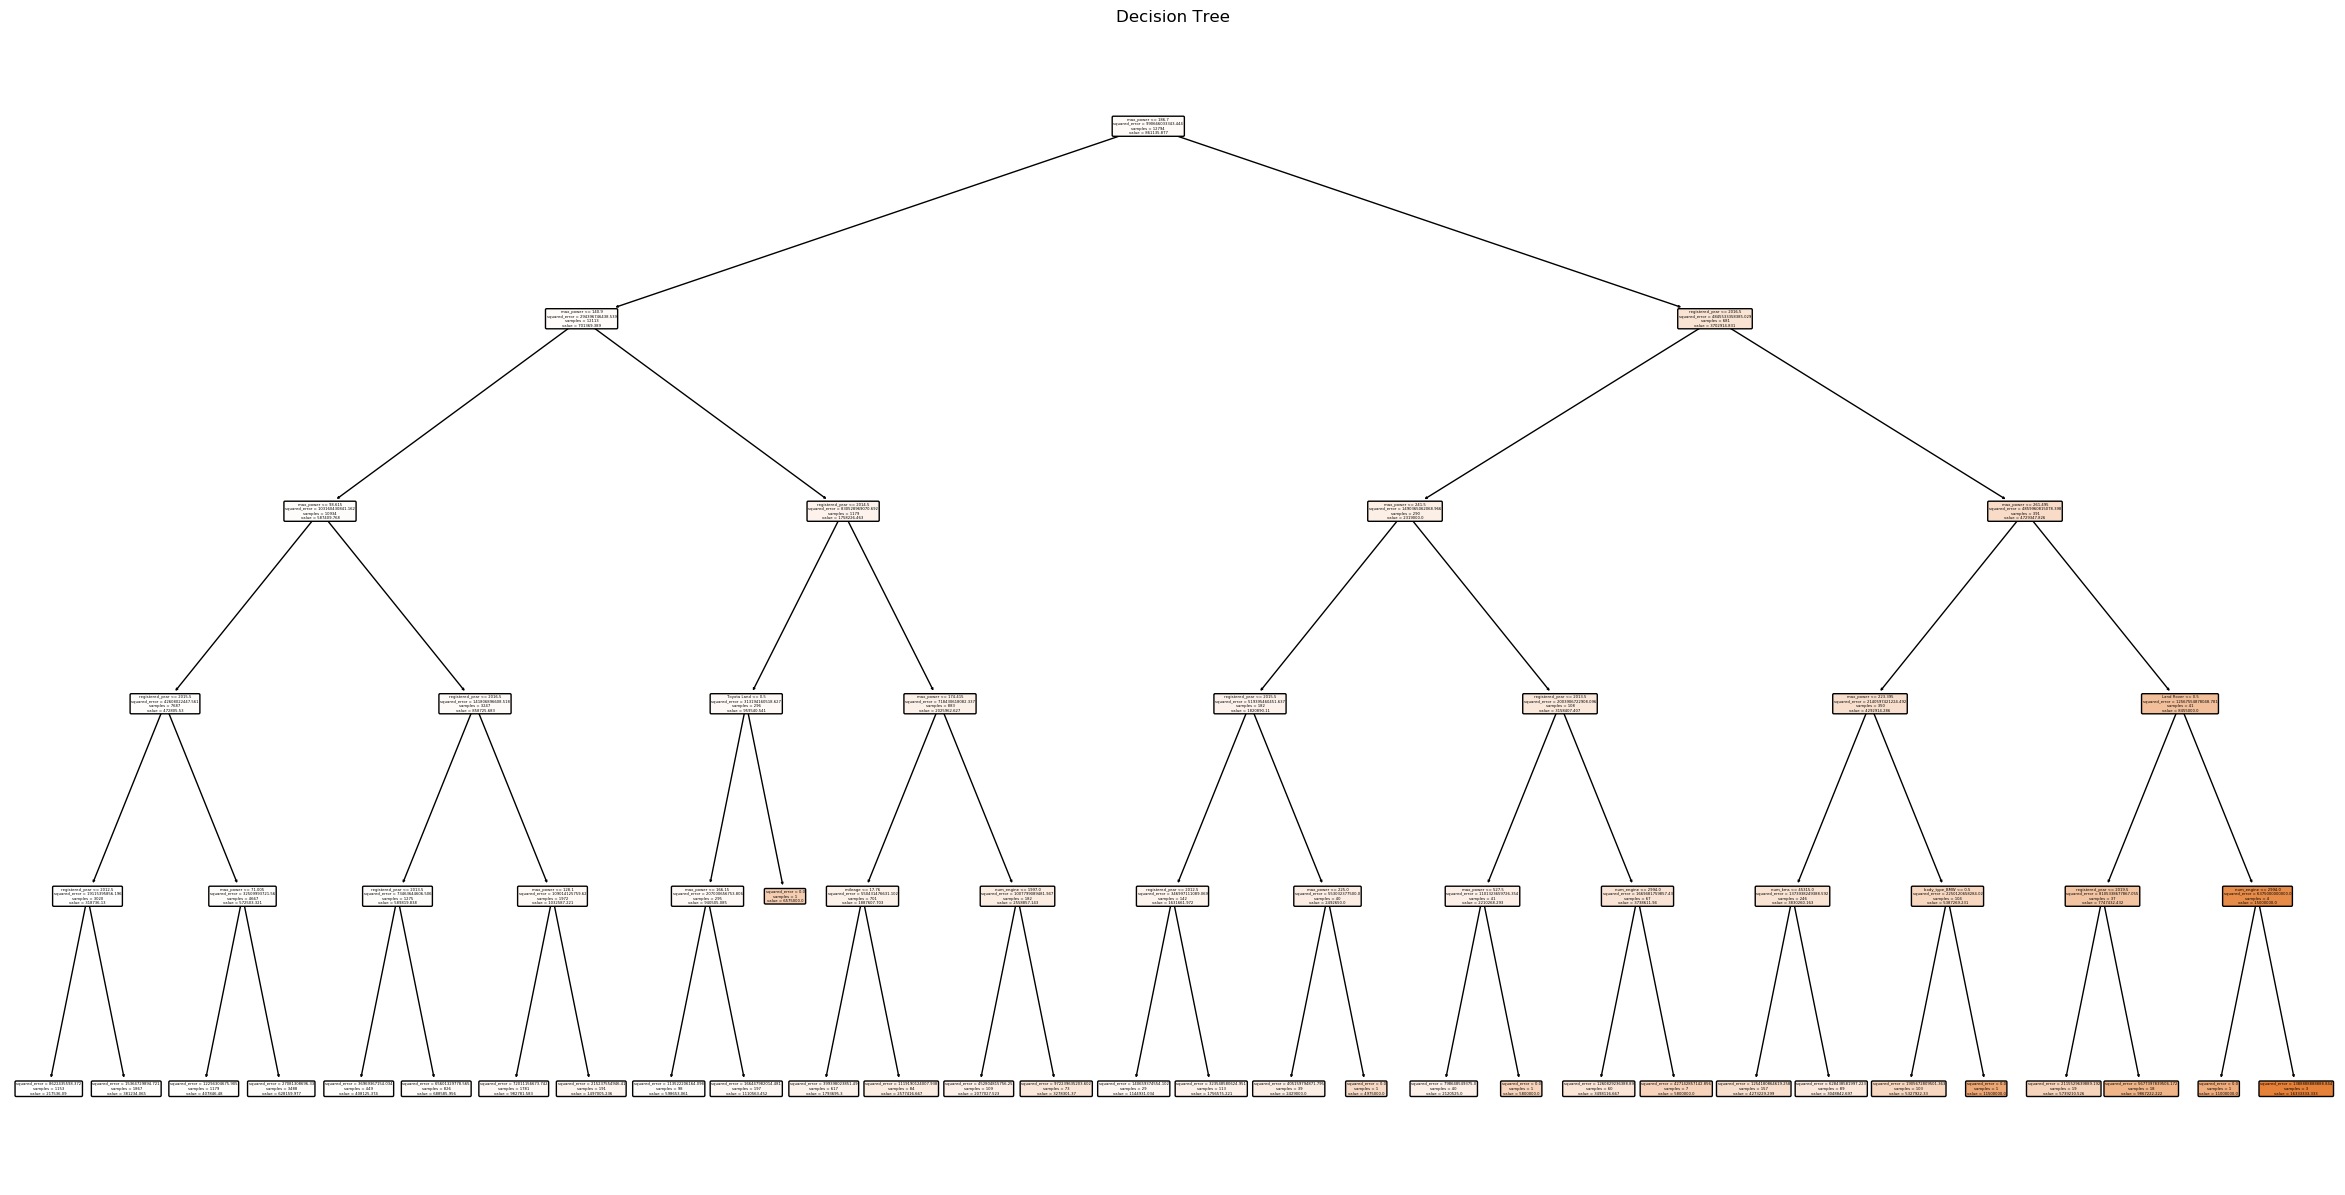

In [32]:
plt.figure(figsize=(30, 15))
plot_tree(tree_reg, filled=True, feature_names=X_train.columns, rounded=True)
plt.title("Decision Tree")
plt.show()
